#                                       Liquide et perméabilité

## Introduction

La percolation 
« passer au travers » : désigne communément le passage d'un fluide à travers un milieu plus ou moins perméable, par exemple dans la préparation du café.

Ce terme a aussi un sens plus précis en physique et en mathématiques : c'est un processus physique critique qui décrit, pour un système, une transition d’un état vers un autre. 

La situation peut être modélisée par un réseau carré bidimensionnel dans lequel des sites individuels peuvent être occupés par le milieu ou ils peuvent être vides. La porosité pp est la fraction des sites vides. Le liquide peut traverser le milieu à travers les sites vides adjacents. Par adjacente nous entendons les 4 prochains voisins (haut-gauche-bas-droite) d'un site dans un réseau carré.


Demander "Est-ce que le liquide fait tout le chemin vers le bas?" est alors équivalent à demander "Y at-il un chemin de sites vides adjacents qui relie le haut et le bas?". Il se trouve que c'est une question facile qui, cependant, est très difficile à répondre. Le système particulier ci-dessus (réseau carré 2-d avec 4 voisins) a une porosité critique pc=0.592746
Cette porosité correspond aux lois suivantes:
* if p < pc : Le liquide n'atteint jamais le fond.
* if p > pc : Il l'atteint, d'où la notation Théorie de percolation. 

In [1]:
p= 0.61 ## Cas du sable N5
Ro=1 ## Masse volumique de l'eau

On importe lesvbibliotheques necessaire pour les simulations qui viennent ensuite

In [2]:
# %matplotlib inline
import numpy as np
from numpy import random

On initialise d'abord la matrice: 

In [3]:
def init_mat():
    m=np.ones((10, 10))
    i=0 
    j=0
    nb= int(p*100)
    positions = [(i,j) for i in range(10) for j in range(10)] # Produit cartésien [0,100[*[0,100[
    positions = np.array(positions)
    indices = np.random.choice(np.arange(len(positions)), nb, replace=False)
    for k in range(nb):
        i=positions[indices][k][0]
        j=positions[indices][k][1]
        m[i,j]=0
    return m

In [4]:
def init_mat_bis(nb_rows=10, nb_cols=10):
    shape = (nb_rows, nb_cols)
    m = np.zeros(shape)
    for j in range(0, nb_cols):
        m[1, j] = 1
    m[1, 4] = 0
    return m

In [5]:
def init_mat_ter(nb_rows=10, nb_cols=10):
    shape = (nb_rows, nb_cols)
    m = np.zeros(shape)
    for j in range(0, nb_cols):
        m[1, j] = 1
    m[1, 4] = 0
    for i in range(2, 6):
        m[i, 3] = 1
        m[i, 5] = 1
    return m

In [6]:
# test de l'intialisation
m = init_mat()

In [7]:
print(m)

[[ 0.  0.  1.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  1.  0.  0.  1.  1.]
 [ 0.  1.  0.  1.  1.  1.  1.  0.  1.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  1.  0.  1.]
 [ 0.  0.  0.  0.  1.  1.  0.  1.  0.  1.]
 [ 1.  0.  1.  1.  0.  0.  0.  1.  1.  1.]
 [ 1.  1.  0.  0.  0.  1.  1.  1.  0.  0.]
 [ 1.  0.  0.  1.  1.  1.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  1.  0.  1.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  1.]]


La on commence à étudier le passage du liquide àpres l'avoir écouler sur toute la surface superieure de la matiere (On la modélésant par la premiere ligne de la matrice)

In [8]:
def voisin(m, i, j):
    _, n = m.shape
    if i < n - 1 and m[i+1, j] == 0:
        # remplir case au dessous
        m[i+1, j] = 2
    if i > 0 and m[i-1, j] == 0 :
        # remplir case au dessus
        m[i-1, j] = 2
    if j < n-1 and m[i, j+1] == 0:
        # remplir à droite
        m[i, j+1] = 2
    if j > 0 and m[i, j-1] == 0:
        # remplir à gauche
        m[i, j-1] = 2
    return m

In [9]:
def principe_propag1_liquide(m):
    a, b = m.shape
    results = []
    for j in range(b):
        m[0, j] = 2
    results.append(m.copy())
    for i in range(0, a):
        for j in range(b):
            # remplir les cases voisines
            if m[i, j] == 2:
                m = voisin(m, i, j)
            if m[i, (a - 1) - j] == 2:
                m = voisin(m, i, (a - 1) - j)
            results.append(m.copy())
    for i in range(0, a):
        for j in range(b):
            if m[(b - 1) -i, j] == 2:
                m = voisin(m, (b - 1) -i, j)
    return results

In [10]:
def simulate():
    m = init_mat()
    results = remp_par_liquide(m)
    return results

In [11]:
results = simulate()

In [12]:
def voisins_pleins(m, i, j):
    a,b = m.shape
    cases = []
    if i < a - 1 and m[i+1, j] == 2:
        # remplir case au dessous
        cases.append((i+1, j))
    if i > 0 and m[i-1, j] == 2 :
        # remplir case au dessus
        cases.append((i-1, j))
    if j < b-1 and m[i, j+1] == 2:
        # remplir à droite
        cases.append((i, j+1))
    if j > 0 and m[i, j-1] == 2:
        # remplir à gauche
        cases.append((i, j-1))
    print("Case {}, cases = {}".format((i,j), cases))
    return cases

In [13]:
def principe_propag1_liquide(matrice):
    (a,b) = matrice.shape
    new_mat = np.zeros((a,b))
    for i in range(a):
        for j in range(b):
            if matrice[i,j] == 1:
                new_mat[i,j] = 1
            elif matrice[i,j] == 2:
                new_mat[i,j] = 2
            else:
                if len(voisins_pleins(matrice, i, j)) > 0:
                    new_mat[i,j] = 2
    
    return new_mat

In [14]:
def simulation():
    new_mat = init_mat()
    (a,b) = new_mat.shape
    for j in range(b):
        new_mat[0, j] = 2
    results = [new_mat.copy()]
    matrice = np.zeros_like(new_mat)
    while (new_mat != matrice).any():
        matrice = new_mat
        new_mat = propage_liquide(matrice)
        results.append(new_mat.copy())
    return results

In [15]:
results = simulation()    

Case (1, 2), cases = [(0, 2)]
Case (1, 3), cases = [(0, 3)]
Case (1, 4), cases = [(0, 4)]
Case (1, 6), cases = [(0, 6)]
Case (1, 7), cases = [(0, 7)]
Case (1, 9), cases = [(0, 9)]
Case (2, 1), cases = []
Case (2, 3), cases = []
Case (2, 4), cases = []
Case (2, 5), cases = []
Case (2, 6), cases = []
Case (2, 8), cases = []
Case (2, 9), cases = []
Case (3, 2), cases = []
Case (3, 5), cases = []
Case (3, 7), cases = []
Case (3, 8), cases = []
Case (3, 9), cases = []
Case (4, 2), cases = []
Case (4, 3), cases = []
Case (4, 4), cases = []
Case (4, 7), cases = []
Case (4, 8), cases = []
Case (4, 9), cases = []
Case (5, 3), cases = []
Case (5, 6), cases = []
Case (5, 7), cases = []
Case (5, 8), cases = []
Case (6, 0), cases = []
Case (6, 2), cases = []
Case (6, 4), cases = []
Case (6, 5), cases = []
Case (6, 6), cases = []
Case (6, 9), cases = []
Case (7, 0), cases = []
Case (7, 1), cases = []
Case (7, 3), cases = []
Case (7, 4), cases = []
Case (7, 6), cases = []
Case (7, 8), cases = []
Case

In [16]:
a = np.array([[1,1], [1,1]])
b = np.array([[1,1], [0,1]])

In [17]:
(a == b).any()

True

In [18]:
print(len(results))
print(results[0])
print(results[-1])

24
[[ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.]
 [ 1.  1.  0.  0.  0.  1.  0.  0.  1.  0.]
 [ 1.  0.  1.  0.  0.  0.  0.  1.  0.  0.]
 [ 1.  1.  0.  1.  1.  0.  1.  0.  0.  0.]
 [ 1.  1.  0.  0.  0.  1.  1.  0.  0.  0.]
 [ 1.  1.  1.  0.  1.  1.  0.  0.  0.  1.]
 [ 0.  1.  0.  1.  0.  0.  0.  1.  1.  0.]
 [ 0.  0.  1.  0.  0.  1.  0.  1.  0.  0.]
 [ 0.  1.  0.  0.  0.  1.  1.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  1.]]
[[ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.]
 [ 1.  1.  2.  2.  2.  1.  2.  2.  1.  2.]
 [ 1.  0.  1.  2.  2.  2.  2.  1.  2.  2.]
 [ 1.  1.  0.  1.  1.  2.  1.  2.  2.  2.]
 [ 1.  1.  0.  0.  0.  1.  1.  2.  2.  2.]
 [ 1.  1.  1.  0.  1.  1.  2.  2.  2.  1.]
 [ 2.  1.  0.  1.  2.  2.  2.  1.  1.  2.]
 [ 2.  2.  1.  2.  2.  1.  2.  1.  2.  2.]
 [ 2.  1.  2.  2.  2.  1.  1.  2.  2.  1.]
 [ 2.  2.  2.  2.  2.  2.  2.  2.  1.  1.]]


# Visualiation:

In [19]:
results = simulation()

Case (1, 1), cases = [(0, 1)]
Case (1, 2), cases = [(0, 2)]
Case (1, 3), cases = [(0, 3)]
Case (1, 4), cases = [(0, 4)]
Case (1, 5), cases = [(0, 5)]
Case (1, 7), cases = [(0, 7)]
Case (1, 8), cases = [(0, 8)]
Case (2, 0), cases = []
Case (2, 1), cases = []
Case (2, 2), cases = []
Case (2, 5), cases = []
Case (2, 6), cases = []
Case (2, 9), cases = []
Case (3, 1), cases = []
Case (3, 3), cases = []
Case (3, 6), cases = []
Case (3, 8), cases = []
Case (4, 3), cases = []
Case (4, 5), cases = []
Case (4, 6), cases = []
Case (4, 7), cases = []
Case (4, 9), cases = []
Case (5, 0), cases = []
Case (5, 2), cases = []
Case (5, 5), cases = []
Case (5, 6), cases = []
Case (5, 7), cases = []
Case (5, 8), cases = []
Case (6, 2), cases = []
Case (6, 3), cases = []
Case (6, 4), cases = []
Case (6, 5), cases = []
Case (6, 7), cases = []
Case (6, 8), cases = []
Case (6, 9), cases = []
Case (7, 0), cases = []
Case (7, 1), cases = []
Case (7, 3), cases = []
Case (7, 6), cases = []
Case (7, 7), cases = [

<IPython.core.display.Javascript object>


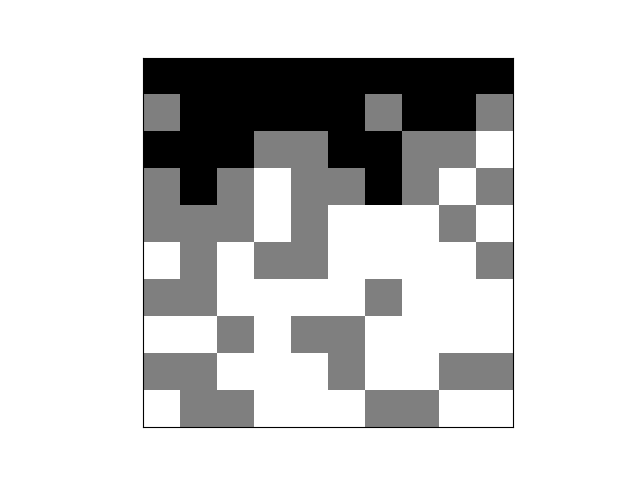

17
0
0
1
2
3
4
5
6
7
8
9
10
11
12


/opt/anaconda3/lib/python3.6/site-packages/matplotlib/animation.py:1021: UserWarning: MovieWriter ffmpeg unavailable
  warnings.warn("MovieWriter %s unavailable" % writer)


13
14
15
16


In [20]:
# 
# from pylab import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib notebook

# size = np.array(results[0].shape)
# dpi = 300.0
# figsize= size[1]/float(dpi),size[0]/float(dpi)
# fig = plt.figure(figsize = figsize, dpi = dpi, facecolor = "white")
fig = plt.figure()
im = plt.imshow(results[0], interpolation = 'nearest', cmap = plt.cm.gray_r, animated=True)
plt.xticks([]), plt.yticks([])

def update(i):
    im.set_array(results[i])
    print(i)
    return im,

print(len(results))
ani = animation.FuncAnimation(fig, update, frames=range(0, len(results)), interval=200, repeat=True)
    
plt.show()
ani.save('testTrue.gif', fps=30, extra_args=['-vcodec', 'libx264'])